# Decison Trees

In this project, we will make use of decison trees to diagnose breast cancer from routine blood analysis. The dataset is very small with only 116 instances.

The following 10 attributes are available:

`Age` - age of patient (years)

`BMI` - body mass index (kg/m<sup>2</sup>)

`Glucose` - glucose concentration in blood (mg/dL)

`Insulin` - concentration of insulin in blood (microU/mL)

`HOMA` - Homeostatic Model Assessment of Insulin Resistance (`glucose` multiplied by `insulin`)

`Leptin` - Concentration of leptin: the hormone of energy expenditure (ng/mL)

`Adiponectin` - Concentration of adiponectin: a protein regulating glucose levels (microg/mL)

`Resistin` - Concentration of resistin: a protein secreted by adipose tissue (ng/mL)

`MCP.1` - Concentration of MCP-1: a protein that recruits monocytes to the sites of inflammation due to tissue injury or inflammation (pg/dL)

`Classification` - Healthy controls (`1`) or patient (`2`)

## Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Exploratory data analysis 

In [2]:
DATAPATH = 'data/dataR2.csv'

data = pd.read_csv(DATAPATH)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


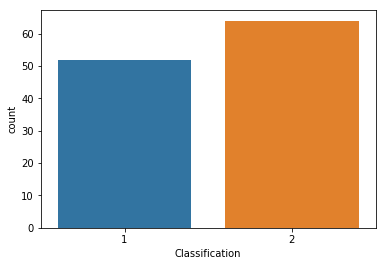

In [3]:
x = data['Classification']

ax = sns.countplot(x=x, data=data)

C:\Users\marco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


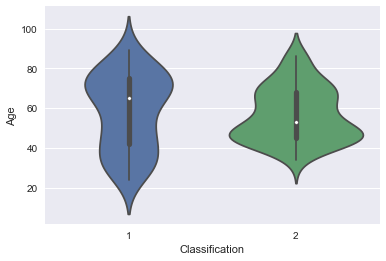

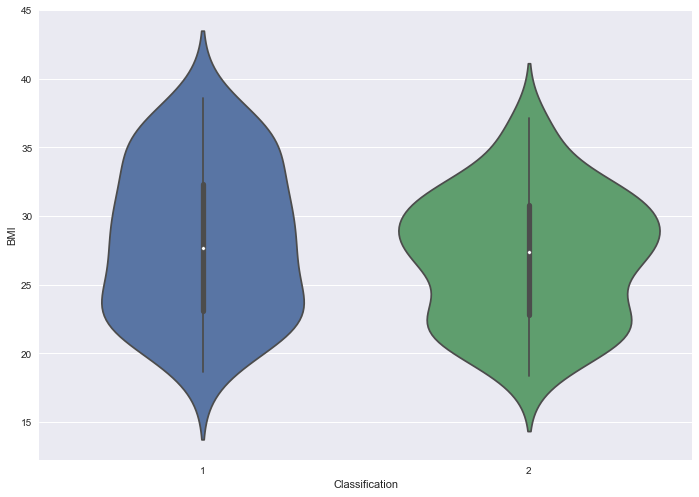

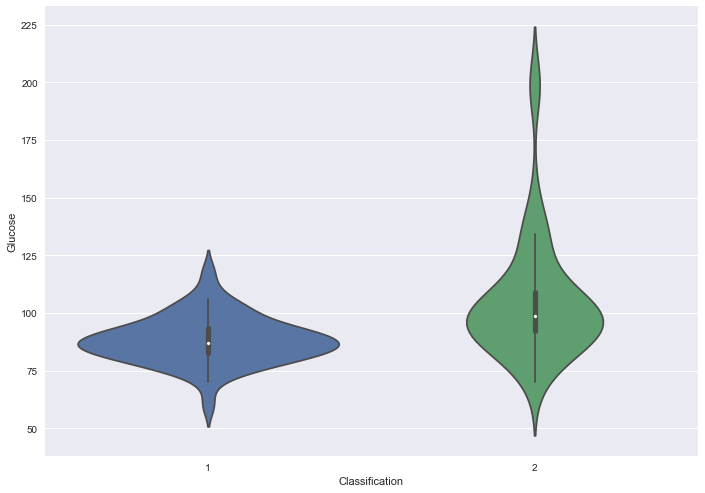

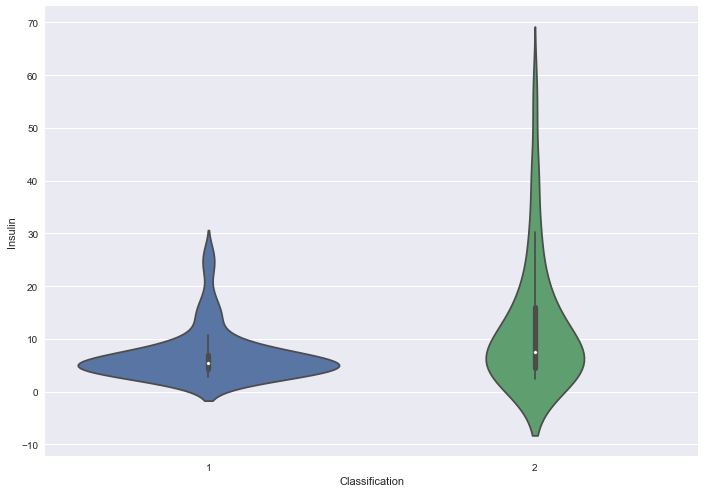

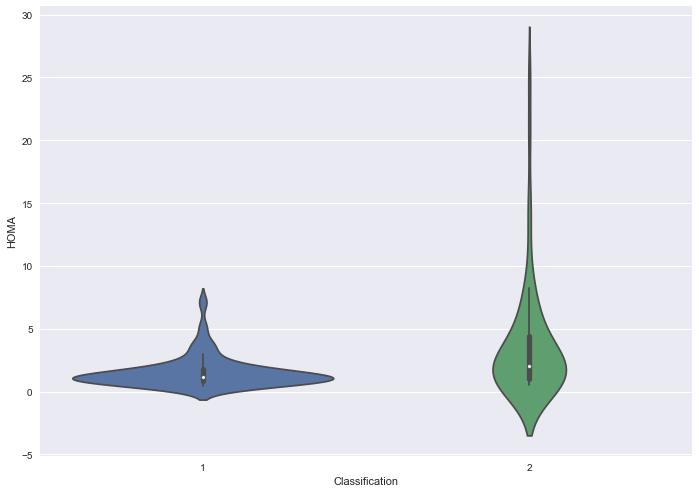

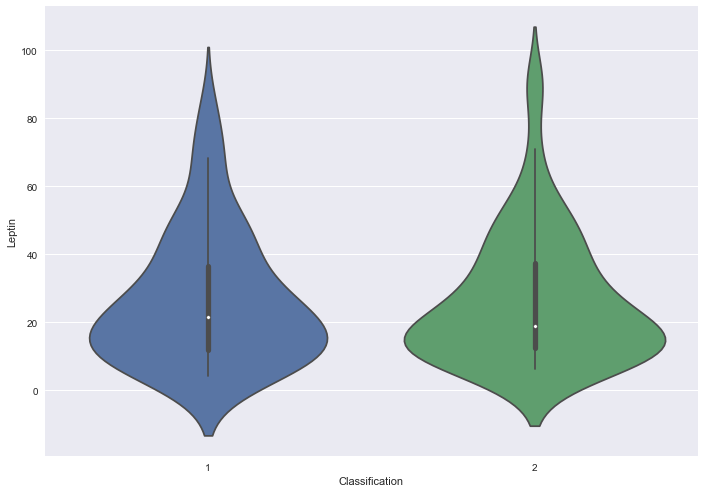

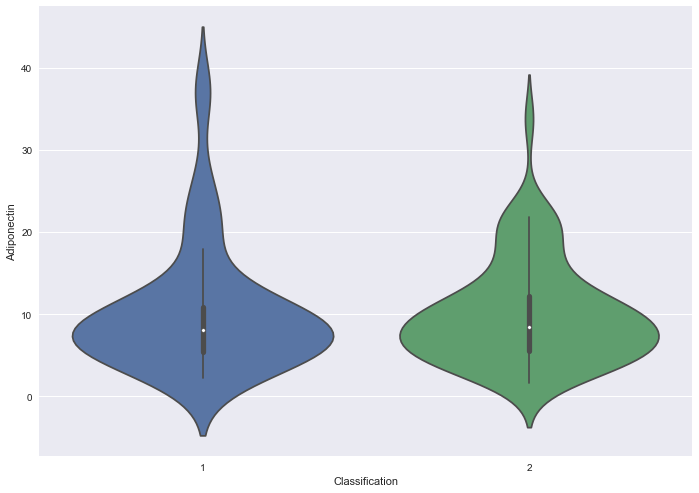

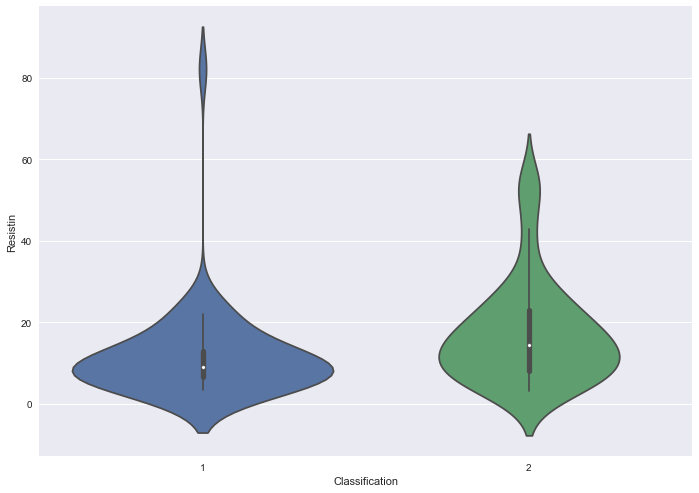

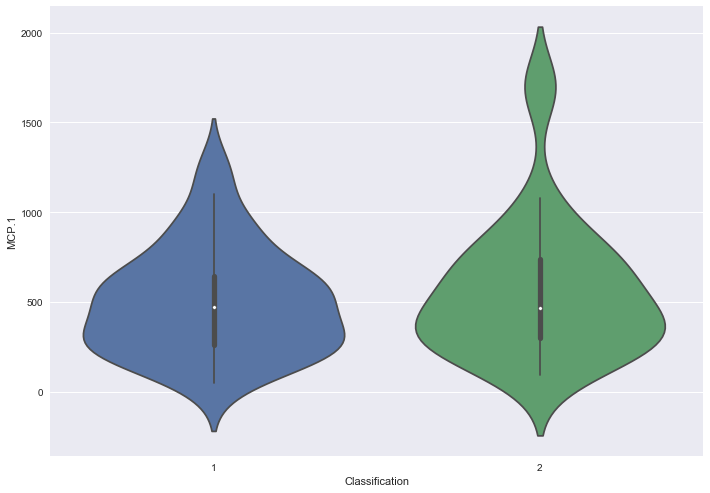

In [4]:
y = data.columns[:-1]
x = data.columns[-1]

def violin_plots(x, y, data):
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.violinplot(x=x, y=col, data=data)
        
violin_plots(x, y, data)

In [5]:
for col in data.columns:
    print("{} : {}".format(col, data[col].isnull().sum()))

Age : 0
BMI : 0
Glucose : 0
Insulin : 0
HOMA : 0
Leptin : 0
Adiponectin : 0
Resistin : 0
MCP.1 : 0
Classification : 0


## Modelling 

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [7]:
from sklearn.model_selection import train_test_split

y = data['Classification'].values.reshape(-1, 1)
X = data.drop('Classification', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Decision tree 

In [8]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[6 3]
 [0 3]]


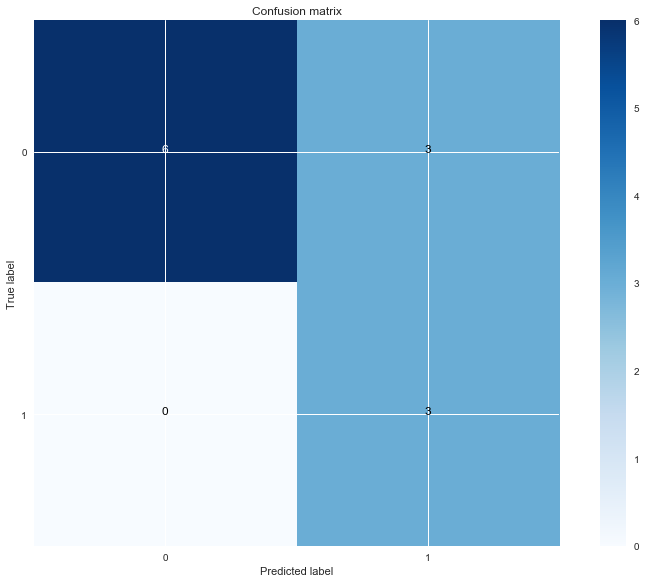

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

decision_tree_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(decision_tree_cm, [0, 1])
plt.show()

### Bagging 

C:\Users\marco\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Confusion matrix, without normalization
[[9 0]
 [0 3]]


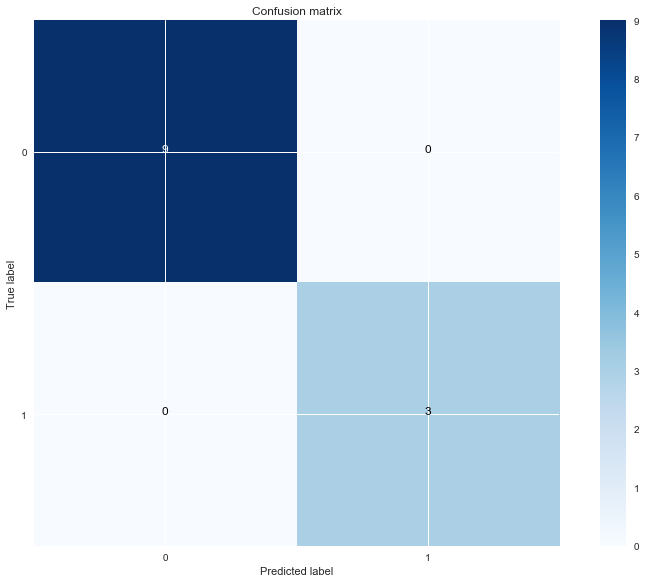

In [10]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier()

bagging_clf.fit(X_train, y_train.ravel())
y_pred_bag = bagging_clf.predict(X_test)

bag_cm = confusion_matrix(y_test, y_pred_bag)

plot_confusion_matrix(bag_cm, [0, 1])
plt.show()

### Random forest classifier

Confusion matrix, without normalization
[[9 0]
 [1 2]]


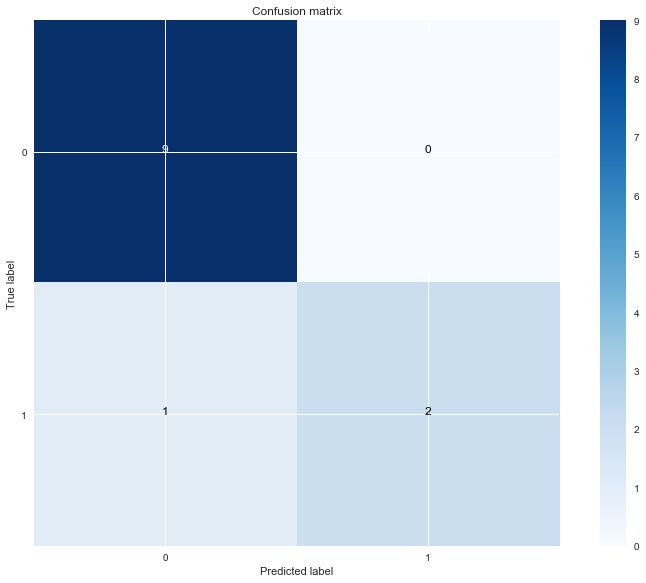

In [11]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(100)

random_clf.fit(X_train, y_train.ravel())
y_pred_random = random_clf.predict(X_test)

random_cm = confusion_matrix(y_test, y_pred_random)

plot_confusion_matrix(random_cm, [0, 1])
plt.show()

### Boosting 

Confusion matrix, without normalization
[[8 1]
 [0 3]]


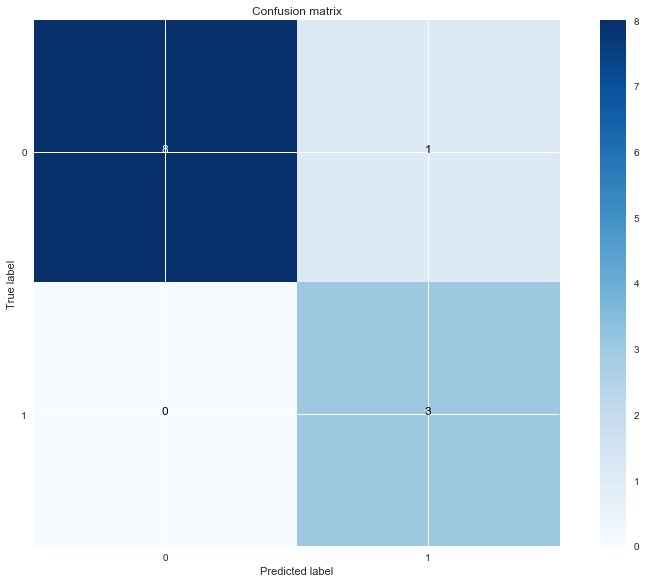

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(X_train, y_train.ravel())
y_pred_boost = boost_clf.predict(X_test)

boost_cm = confusion_matrix(y_test, y_pred_boost)

plot_confusion_matrix(boost_cm, [0, 1])
plt.show()